# Atividade 2.2



### Importanto bibliotecas e acessando a Base de Dados

! Base de Dados do dia: 11/10/2021

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Abrindo o DataSet
#### Modificações Iniciais da Base

data = pd.read_csv('Manaus.csv',sep=';', header=None, skiprows=0)

c:\programdata\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,26,27,28,29,30,31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data.columns = data.iloc[0]

In [3]:
data = data.drop(0)

In [4]:
data.head()

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,...,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
1,25/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,TARUMA,TARUMÃ,OESTE,"0,243042897"
2,03/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,Influenza B,NaN,NaN,NaN,TARUMA-ACU,TARUMÃ-AÇÚ,OESTE,"0,684931507"
3,05/01/2020 00:00,03/01/2020 00:00,03/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,JORGE TEIXEIRA,JORGE TEIXEIRA,LESTE,"0,073137374"
4,16/01/2020 00:00,08/01/2020 00:00,04/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
5,11/01/2020 00:00,08/01/2020 00:00,05/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243984 entries, 1 to 243984
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   _dt_evolucao          119011 non-null  object
 1   _dt_notificacao       243913 non-null  object
 2   _dt_sintomas          235760 non-null  object
 3   _classificacao        243984 non-null  object
 4   _conclusao            180928 non-null  object
 5   _origem               243984 non-null  object
 6   _comorb_cardio        13686 non-null   object
 7   _comorb_cromossomica  527 non-null     object
 8   _comorb_diabetes      9981 non-null    object
 9   _comorb_hemato        175 non-null     object
 10  _comorb_hepatica      135 non-null     object
 11  _comorb_imuno         1805 non-null    object
 12  _comorb_neurologica   542 non-null     object
 13  _comorb_obessidade    573 non-null     object
 14  _comorb_renal         1098 non-null    object
 15  _comorb_respirato

#### Removendo Casos que não são confirmados

In [6]:
x = data.loc[data['_classificacao']!='Confirmado']

x.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            243970, 243972, 243973, 243975, 243976, 243977, 243979, 243981,
            243982, 243984],
           dtype='int64', length=163564)

In [7]:
data = data.drop(x.index)

In [8]:
data['_classificacao'].value_counts()

Confirmado    80420
Name: _classificacao, dtype: int64

In [9]:
data = data.drop(columns=['_comorb_cardio','_comorb_cromossomica','_comorb_diabetes','_comorb_hemato','_comorb_hepatica','_comorb_imuno','_comorb_neurologica','_comorb_obessidade','_comorb_renal','_comorb_respiratoria',
'_sintoma_dispneia','_sintoma_febre','_sintoma_garganta','_sintoma_tosse','_sintoma_outros','_etnia','_evolução','_profiss_saude','_dt_evolucao','_dt_sintomas','_gestante','_raca'])

In [10]:
data.head()

,_dt_notificacao,_classificacao,_conclusao,_origem,_criterio,_idade,_faixa etária,_se_notificacao,_sexo,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
131,23/02/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Laboratorial,12,10a - 14a,9,F,SRAG não especificado,NaN,NaN,1,MAUAZINHO,MAUAZINHO,LESTE,"0,35040998"
145,28/02/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Laboratorial,39,30a - 39a,9,F,Vírus Sincicial Respiratório,NaN,NaN,1,NOVO ALEIXO,NOVO ALEIXO,NORTE,"0,085452557"
154,02/03/2020 00:00,Confirmado,Recuperado,"SIVEP, eSUS VE,",Laboratorial,2,1a - 4a,10,F,SRAG não especificado,1,NaN,NaN,PRACA 14 DE JANEIRO,PRAÇA 14 DE JANEIRO,SUL,"0,861920359"
159,02/03/2020 00:00,Confirmado,Recuperado,"SIVEP, eSUS VE,",Laboratorial,71,70a - 79a,10,F,SRAG não especificado,2,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
197,11/03/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Clínico,46,40a - 49a,11,F,SRAG não especificado,NaN,NaN,2,CIDADE NOVA,CIDADE NOVA,NORTE,"0,068152389"


In [11]:
#data.dropna(subset=['_dt_notificacao','_classificacao','_conclusao','_origem','_criterio','_idade','_faixa etária','_se_notificacao','_sexo','_srag','_teste_anticorpo','_teste_antigeno','_teste_pcr','_bairro','_bairro_mapa','_distrito','_taxa'],inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80420 entries, 131 to 243983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _dt_notificacao   80395 non-null  object
 1   _classificacao    80420 non-null  object
 2   _conclusao        42774 non-null  object
 3   _origem           80420 non-null  object
 4   _criterio         8842 non-null   object
 5   _idade            80395 non-null  object
 6   _faixa etária     80395 non-null  object
 7   _se_notificacao   80395 non-null  object
 8   _sexo             80301 non-null  object
 9   _srag             9095 non-null   object
 10  _teste_anticorpo  52177 non-null  object
 11  _teste_antigeno   8342 non-null   object
 12  _teste_pcr        23308 non-null  object
 13  _bairro           79649 non-null  object
 14  _bairro_mapa      76699 non-null  object
 15  _distrito         76699 non-null  object
 16  _taxa             76699 non-null  object
dtypes: object

###### REMOVENDO LINHAS SEM BAIRROS IDENTIFICADOS 

In [13]:
nan_value = float("NaN")
data['_bairro'].replace("", nan_value, inplace=True)
data['_bairro'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243971     True
243974    False
243978    False
243980    False
243983    False
Name: _bairro, Length: 80420, dtype: bool

In [14]:
data.dropna(subset = ["_bairro"], inplace=True)
bairros = data['_bairro'].value_counts()
bairros

CIDADE NOVA                 4767
FLORES                      3007
SAO JOSE OPERARIO           2637
NOVO ALEIXO                 2366
ALVORADA                    2314
                            ... 
VIEIRA LVES                    1
ARCO IRIS                      1
NOSSA SENHOR ADAS GRAÇAS       1
CONJ CIDADE NOVA II            1
COLÔNIA ANTONIO ALEIXO         1
Name: _bairro, Length: 2629, dtype: int64

In [15]:
nan_value = float("NaN")
data['_sexo'].replace("", nan_value, inplace=True)
data['_sexo'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243924    False
243974    False
243978    False
243980    False
243983    False
Name: _sexo, Length: 79649, dtype: bool

In [16]:
data.dropna(subset = ["_sexo"], inplace=True)
data['_sexo'].value_counts()

F    43805
M    35725
Name: _sexo, dtype: int64

In [17]:
nan_value = float("NaN")
data['_idade'].replace("", nan_value, inplace=True)
data['_idade'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243924    False
243974    False
243978    False
243980    False
243983    False
Name: _idade, Length: 79530, dtype: bool

In [18]:
data.dropna(subset = ["_idade"], inplace=True)
data['_idade'].value_counts()

38.0     2041
40.0     1986
41.0     1934
39.0     1931
37.0     1931
         ... 
119.0       1
139.0       1
102         1
109.0       1
118         1
Name: _idade, Length: 219, dtype: int64

In [19]:
'''nan_value = float("NaN")
data['_conclusao'].replace("", nan_value, inplace=True)
data['_conclusao'].isnull()
data.dropna(subset = ['_conclusao'], inplace=True)'''

'nan_value = float("NaN")\ndata[\'_conclusao\'].replace("", nan_value, inplace=True)\ndata[\'_conclusao\'].isnull()\ndata.dropna(subset = [\'_conclusao\'], inplace=True)'

### Atividade 2.2.1 Ordem com 10 Bairros com mais casos confirmados

In [20]:
outro_bairros=bairros[11:].sum()
bairros

CIDADE NOVA                 4767
FLORES                      3007
SAO JOSE OPERARIO           2637
NOVO ALEIXO                 2366
ALVORADA                    2314
                            ... 
VIEIRA LVES                    1
ARCO IRIS                      1
NOSSA SENHOR ADAS GRAÇAS       1
CONJ CIDADE NOVA II            1
COLÔNIA ANTONIO ALEIXO         1
Name: _bairro, Length: 2629, dtype: int64

In [21]:
locais = bairros[0:10].to_frame()

In [22]:
locais.loc['Outros'] = [outro_bairros]

In [23]:
locais

,_bairro
CIDADE NOVA,4767
FLORES,3007
SAO JOSE OPERARIO,2637
NOVO ALEIXO,2366
ALVORADA,2314
JORGE TEIXEIRA,2294
CENTRO,2210
COMPENSA,2200
COROADO,2067
ALEIXO,2007


In [24]:
n_casos = locais['_bairro'].values.tolist()

In [25]:
nome_locais = locais.index.tolist()

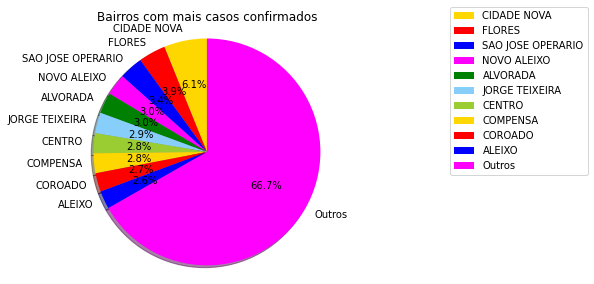

In [26]:

cores=['gold', 'red', 'blue', 'magenta', 'green','lightskyblue', 'yellowgreen']

# Atribuindo um título ao gráfico
plt.title('Bairros com mais casos confirmados')

plt.pie(n_casos, labels=nome_locais, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(nome_locais, bbox_to_anchor=(1.3, 1.1))

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()

### 2.2.1 - Distribuição dos 10 bairros com mais casos confirmados, incluindo demais bairros

## ----------------------------------------------------------------------------------------------------------
## Atividade 2.2.2

In [27]:
data['_sexo'].value_counts()

F    43798
M    35707
Name: _sexo, dtype: int64

In [28]:
data['_sexo']

131       F
145       F
154       F
159       F
197       F
         ..
243924    M
243974    M
243978    F
243980    F
243983    F
Name: _sexo, Length: 79505, dtype: object

In [29]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79505 entries, 131 to 243983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _dt_notificacao   79505 non-null  object
 1   _classificacao    79505 non-null  object
 2   _conclusao        42685 non-null  object
 3   _origem           79505 non-null  object
 4   _criterio         8823 non-null   object
 5   _idade            79505 non-null  object
 6   _faixa etária     79505 non-null  object
 7   _se_notificacao   79505 non-null  object
 8   _sexo             79505 non-null  object
 9   _srag             9074 non-null   object
 10  _teste_anticorpo  51969 non-null  object
 11  _teste_antigeno   8331 non-null   object
 12  _teste_pcr        22621 non-null  object
 13  _bairro           79505 non-null  object
 14  _bairro_mapa      76559 non-null  object
 15  _distrito         76559 non-null  object
 16  _taxa             76559 non-null  object
dtypes: object

        Modificamos o Dtpye da Coluna '_idade', de 'objet' para 'float', para aplicarmos o BoxPlot

In [30]:
data['_idade'] = data['_idade'].astype(float, errors = 'raise')

<AxesSubplot:title={'center':'_idade'}, xlabel='_sexo'>

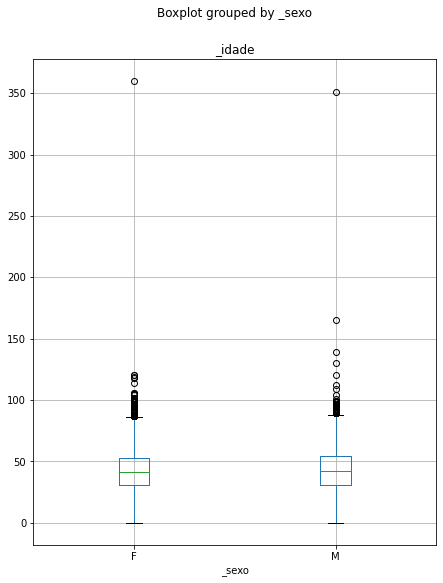

In [31]:
data.boxplot(column=['_idade'],by='_sexo',figsize=(7,9))

In [32]:
x = data.loc[data['_idade']>=150]

In [33]:
x.index

Int64Index([23222, 59745, 83433], dtype='int64')

Podemos considerar remover estes dados do dataset([23222,59745,83433]), pois estes estão com dados incorretos.

#### Como podemos ver, há muitos outliners, principalmente entre as idades próximas a 80 e 100 anos.

# -----------------------------------------------------------------------------------------

## Atividade 2.2.3 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79505 entries, 131 to 243983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _dt_notificacao   79505 non-null  object 
 1   _classificacao    79505 non-null  object 
 2   _conclusao        42685 non-null  object 
 3   _origem           79505 non-null  object 
 4   _criterio         8823 non-null   object 
 5   _idade            79505 non-null  float64
 6   _faixa etária     79505 non-null  object 
 7   _se_notificacao   79505 non-null  object 
 8   _sexo             79505 non-null  object 
 9   _srag             9074 non-null   object 
 10  _teste_anticorpo  51969 non-null  object 
 11  _teste_antigeno   8331 non-null   object 
 12  _teste_pcr        22621 non-null  object 
 13  _bairro           79505 non-null  object 
 14  _bairro_mapa      76559 non-null  object 
 15  _distrito         76559 non-null  object 
 16  _taxa             76559 non-null  obj

In [35]:
data['_dt_notificacao']=pd.to_datetime(data['_dt_notificacao'])


<AxesSubplot:title={'center':'Casos novos confirmados nos últimos 10 dias'}>

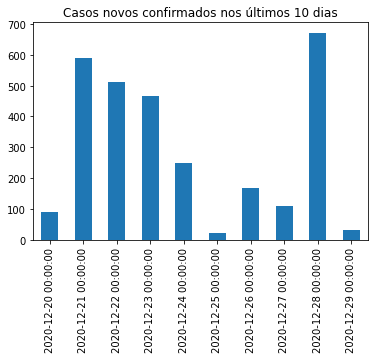

In [36]:
data['_dt_notificacao'].value_counts().sort_index()[-10:].plot.bar(title = 'Casos novos confirmados nos últimos 10 dias')

In [37]:
data['_dt_notificacao'].value_counts().sort_index()[-10:].mean()

290.5

#### Com o gráfico, verificamos a quantidade de novos casos, nos útimos 10 dias do DataSet, com uma média de 290 casos nesse intervalo.

# -----------------------------------------------------------------------------------------

## Atividade 2.2.4

<AxesSubplot:title={'center':'Casos recuperados nos últimos 10 dias'}>

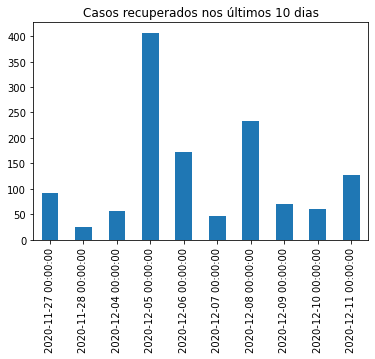

In [38]:
recuperados = data.loc[data['_conclusao']=='Recuperado']
recuperados['_dt_notificacao'].value_counts().sort_index()[-10:].plot.bar(title = 'Casos recuperados nos últimos 10 dias')

In [39]:
recuperados['_dt_notificacao'].value_counts().sort_index()[-10:].mean()

128.9

#### Com o gráfico, verificamos a quantidade dos ultimos casos recuperados, nos útimos 10 dias disponiveis no DataSet, com uma média de 129 recuperados nesse intervalo.

# ------------------------------------------------------------------------------------------------------


## Atividade 2.2.5

## Atividade 2.2.6

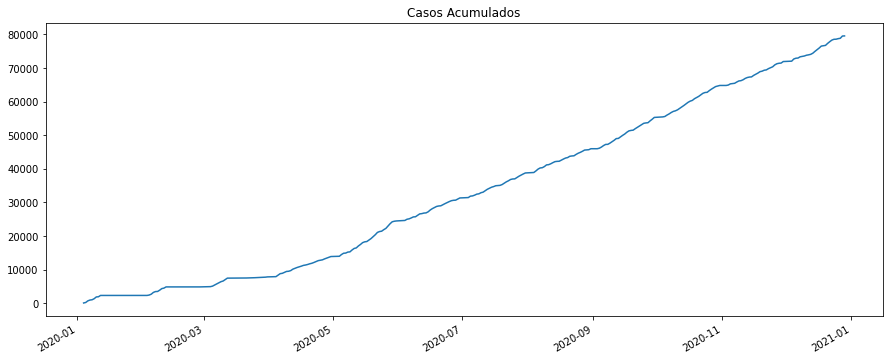

In [40]:
xxx = data['_dt_notificacao'].value_counts().sort_index().cumsum().plot(title = 'Casos Acumulados',figsize=(15,6))

#### Acumulado de casos confirmados

# ---------------------------------------------------------------------------------------